In [18]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,30))

imageA = "additional_data/pic1.jpg"
pic2 = "additional_data/pic2.jpg"
pierro = "additional_data/pierro_della.jpg"
venez="additional_data/veneziano.jpg"
sisch = "additional_data/Sistinechapel.jpg"


img=mpimg.imread(venez)

pt=[]

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)
    pt.append([ix,iy])

    if len(pt) == 4:
        fig.canvas.mpl_disconnect(cid)
        plt.close(fig)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()


280.82052373855663 957.2747498403235
277.17990206514787 999.1418990845219
703.1326378539495 1010.0637641047476
699.492016180541 970.0169256972534


pts are :  [[np.float64(280.82052373855663), np.float64(957.2747498403235)], [np.float64(699.492016180541), np.float64(970.0169256972534)], [np.float64(277.17990206514787), np.float64(999.1418990845219)], [np.float64(703.1326378539495), np.float64(1010.0637641047476)]]
Pt 1 is  [np.float64(280.82052373855663), np.float64(957.2747498403235)] 
Pt2 is [np.float64(699.492016180541), np.float64(970.0169256972534)] 
Pt3 is  [np.float64(703.1326378539495), np.float64(1010.0637641047476)] 
Pt4 is  [np.float64(277.17990206514787), np.float64(999.1418990845219)]


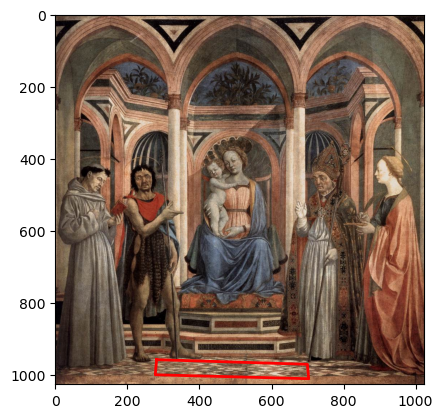

Height and width are  1026 1025


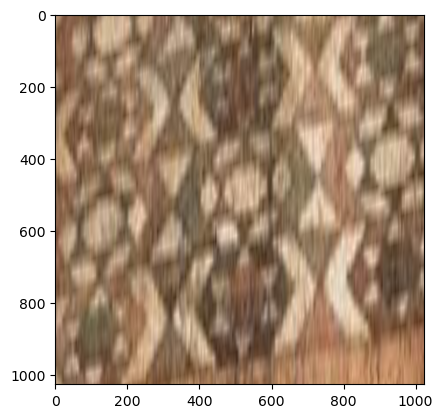

In [19]:
import cv2
import cv2 as cv
import numpy as np
pt.sort(key = lambda point:point[1])

print("pts are : ",pt)

if(pt[0][0]<pt[1][0]):
    pt1 = pt[0]
    pt2 = pt[1]
else:
    pt1 = pt[1]
    pt2 = pt[0]

if(pt[2][0]>pt[3][0]):
    pt3 = pt[2]
    pt4 = pt[3]
else:
    pt3 = pt[3]
    pt4 = pt[2]

print("Pt 1 is ",pt1, "\nPt2 is",pt2,"\nPt3 is ",pt3,"\nPt4 is ",pt4)

x = [pt1[0],pt2[0],pt3[0],pt4[0],pt1[0]]
y = [pt1[1],pt2[1],pt3[1],pt4[1], pt1[1]]
%matplotlib inline
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.plot(x,y, color="red", linewidth=2)
# plt.plot(pt2,pt3, color="red", linewidth=2)
# plt.plot(pt3,pt4, color="red", linewidth=2)
#plt.plot(pt4,pt1, color="red", linewidth=2)
plt.imshow(img)
plt.show()

# width = max( abs(pt2[0] - pt1[0]), abs(pt3[0] - pt4[0]) )
# height = max(abs(pt3[1] - pt2[1]), abs(pt4[1] - pt1[1]) )
height,width = img.shape[:2]
print("Height and width are ",height,width)

src_pts = np.float32( [  pt1, pt2, pt3, pt4  ]  )
dst_pts = np.float32(  [ [0,0],[width,0],[width,height], [0,height] ])


homogM = cv2.getPerspectiveTransform(src_pts, dst_pts)


panorama2 = cv2.warpPerspective(img, homogM,(int(width), int(height)))


# Display the panorama
#plt.imshow(cv.cvtColor(panorama2, cv.COLOR_BGR2RGB))
plt.imshow(panorama2)
plt.show()
